In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#Let's make this notebook reproducible 
np.random.seed(42)
random.seed(42)

In [4]:
newyork = pd.read_csv('C:/Users/Harraj/Documents/GitHub/AirbnbSoen499/data/AB_NYC_2019.csv')


In [5]:
newyork = newyork.drop(['host_name', 'id', ], axis=1)

In [6]:
newyork = newyork.drop(['host_id'], axis=1)

In [9]:
newyork.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
newyork = newyork.drop(['last_review'], axis=1)

In [10]:
newyork['reviews_per_month'] = newyork['reviews_per_month'].replace(np.nan, 0)

In [11]:
newyork.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [14]:
newyork.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
newyork = newyork.drop(['name'], axis=1)

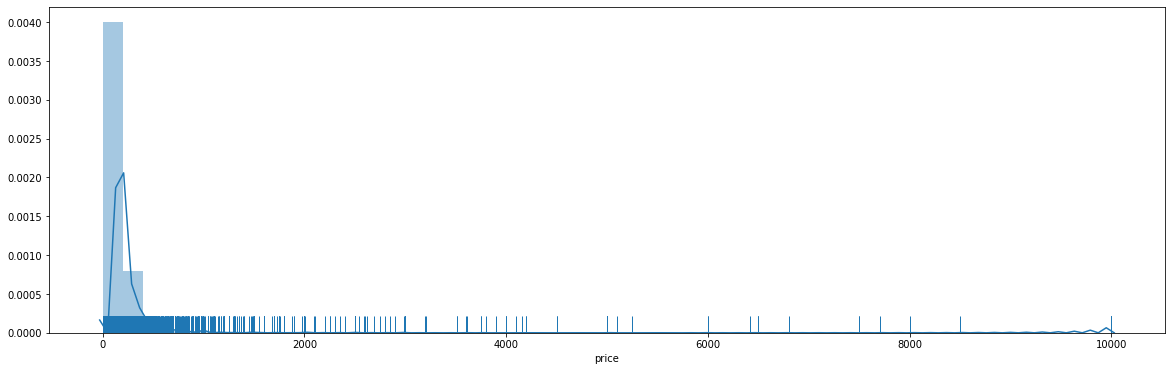

In [70]:

plt.figure(figsize=(20,6))
sb.distplot(newyork['price'], rug=True)

In [19]:
print(sorted(newyork['neighbourhood_group'].unique()))

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


In [42]:
newyork.neighbourhood_group.value_counts()
#Number of airbnb we have in each neighbour group.

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

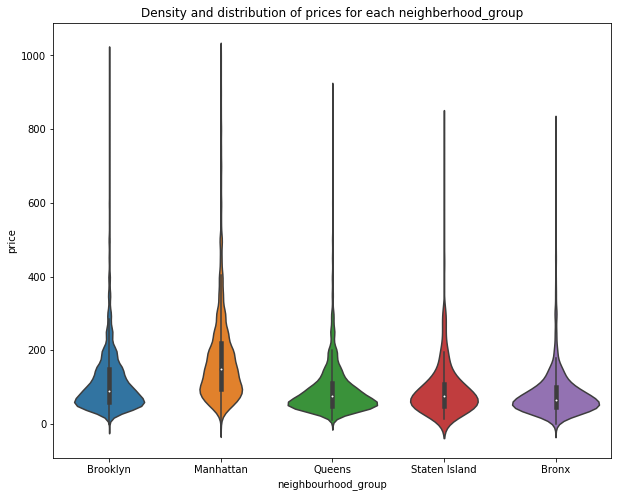

In [48]:
fig,ax=plt.subplots(figsize=(10,8))
sub_df = newyork[newyork.price < 1000]
plot_2=sb.violinplot(data=sub_df, x='neighbourhood_group', y='price')
plot_2.set_title('Density and distribution of prices for each neighberhood_group')

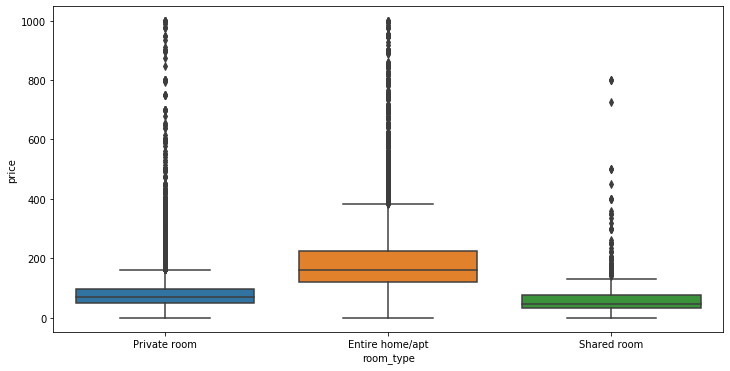

In [66]:
sub_df = newyork[newyork.price < 1000]
plt.figure(figsize = (12, 6))
sb.boxplot(x = 'room_type', y = 'price',  data = sub_df)


In [74]:
top10_freq_neighbourhood=newyork.neighbourhood.value_counts().head(10)
print(top10_freq_neighbourhood)


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


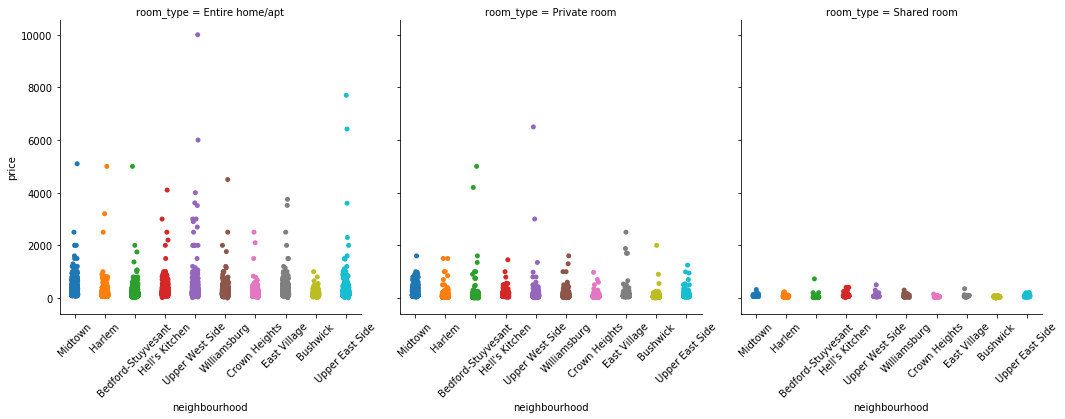

In [78]:
top10_freq_neighbourhood_data=newyork[newyork['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
t=sb.catplot(x="neighbourhood", y="price", col="room_type", data=top10_freq_neighbourhood_data)
t.set_xticklabels(rotation=45)

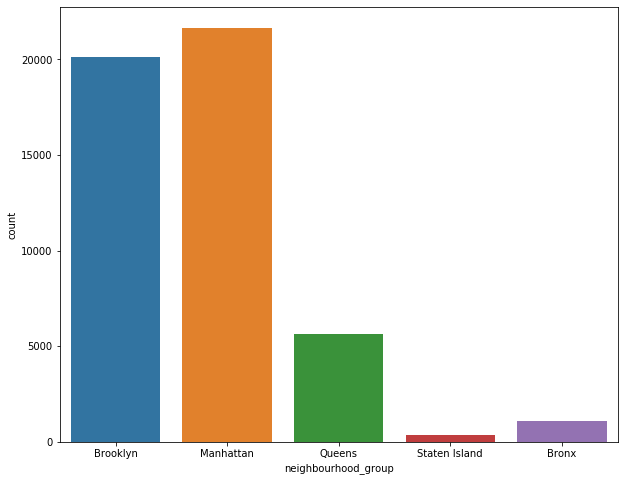

In [79]:
fig,ax=plt.subplots(figsize=(10,8))
sb.countplot(newyork['neighbourhood_group'])